# **데이터 불러오기 및 메모리 축소**

In [1]:
#필요한 라이브러리 불러오기 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from lightgbm import LGBMRegressor
import lightgbm as lgb

warnings.filterwarnings('ignore')
%matplotlib inline

pd.options.display.float_format = '{:,.3f}'.format
sns.set()

In [2]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
import gc

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#train 데이터 불러오기 

pubg_data = pd.read_csv("/content/drive/MyDrive/train_V2.csv")   #각자 구글 드라이브에 들어가면 바로 보이게 파일 넣으시고 경로 변경 없이 바로 데이터 불러올 수 있게 설정함 
df = pubg_data
df.info()

# 그냥 불러오면 983.9MB로 메모리가 굉장히 큰 상태 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [5]:
%%time
df.info()

# Memory usages in Bytes
print("Reduced Memory size: ",df.memory_usage(index=True).sum()/(1024*1024), "MB")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [6]:
for column_name in df:
    if df[column_name].dtype=='float64':
        df[column_name] = pd.to_numeric(df[column_name], downcast= 'float')
    if df[column_name].dtype=='int64':
        df[column_name] = pd.to_numeric(df[column_name],downcast='integer')

In [7]:
%%time
df.info()

# Memory usages in Bytes
print("Reduced Memory size: ",df.memory_usage(index=True).sum()/(1024*1024), "MB")

# 데이터의 메모리가 상당히 많이 줄었음을 알 수 있음 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int8   
 4   boosts           int8   
 5   damageDealt      float32
 6   DBNOs            int8   
 7   headshotKills    int8   
 8   heals            int8   
 9   killPlace        int8   
 10  killPoints       int16  
 11  kills            int8   
 12  killStreaks      int8   
 13  longestKill      float32
 14  matchDuration    int16  
 15  matchType        object 
 16  maxPlace         int8   
 17  numGroups        int8   
 18  rankPoints       int16  
 19  revives          int8   
 20  rideDistance     float32
 21  roadKills        int8   
 22  swimDistance     float32
 23  teamKills        int8   
 24  vehicleDestroys  int8   
 25  walkDistance     float32
 26  weaponsAcquired  int16  
 27  winPoints   

# **데이터 살펴보기 및 전처리**

In [11]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.000,0,0,0,60,...,0,0.000,0,0.000,0,0,244.800,1,1466,0.444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.470,0,0,0,57,...,0,0.004,0,11.040,0,0,"1,434.000",5,0,0.640
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.000,0,0,0,47,...,0,0.000,0,0.000,0,0,161.800,2,0,0.775
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.900,0,0,0,75,...,0,0.000,0,0.000,0,0,202.700,3,0,0.167
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000,0,0,0,45,...,0,0.000,0,0.000,0,0,49.750,2,0,0.188


In [12]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [13]:
print("Train : ", df.shape)

Train :  (4446966, 29)


In [14]:
# col 생략 없이 출력
pd.set_option('display.max_columns', None)

In [15]:
df.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,"4,446,966.000","4,446,966.000","4,446,966.000","4,446,966.000","4,446,966.000","4,446,966.000","4,446,966.000","4,446,966.000","4,446,966.000","4,446,966.000","4,446,966.000","4,446,966.000","4,446,966.000","4,446,966.000","4,446,966.000","4,446,966.000","4,446,966.000","4,446,966.000","4,446,966.000","4,446,966.000","4,446,966.000","4,446,966.000","4,446,966.000","4,446,966.000","4,446,965.000"
mean,0.234,1.107,130.717,0.658,0.227,1.370,47.599,505.006,0.925,0.544,22.998,"1,579.506",44.505,43.008,892.010,0.165,606.116,0.003,4.509,0.024,0.008,"1,154.218",3.660,606.460,0.473
std,0.589,1.716,170.781,1.146,0.602,2.680,27.463,627.505,1.558,0.711,50.973,258.740,23.828,23.289,736.648,0.472,"1,498.344",0.073,30.502,0.167,0.093,"1,183.497",2.457,739.700,0.307
min,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,9.000,1.000,1.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,0.000,0.000,0.000,24.000,0.000,0.000,0.000,0.000,"1,367.000",28.000,27.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,155.100,2.000,0.000,0.200
50%,0.000,0.000,84.240,0.000,0.000,0.000,47.000,0.000,0.000,0.000,0.000,"1,438.000",30.000,30.000,"1,443.000",0.000,0.000,0.000,0.000,0.000,0.000,685.600,3.000,0.000,0.458
75%,0.000,2.000,186.000,1.000,0.000,2.000,71.000,"1,172.000",1.000,1.000,21.320,"1,851.000",49.000,47.000,"1,500.000",0.000,0.191,0.000,0.000,0.000,0.000,"1,976.000",5.000,"1,495.000",0.741
max,22.000,33.000,"6,616.000",53.000,64.000,80.000,101.000,"2,170.000",72.000,20.000,"1,094.000","2,237.000",100.000,100.000,"5,910.000",39.000,"40,710.000",18.000,"3,823.000",12.000,5.000,"25,780.000",236.000,"2,013.000",1.000


In [16]:
df.isnull().sum()  #결측치는 'winPlacePerc'(승률 변수)에서 존재   

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [17]:
df[df['winPlacePerc'].isna()==True]

# 전체 4446966 행에서 결측치 행 1행은 소수
# winPlacePerc 변수에서 결측치 값이 있는 1 행만 추출: 별 의미 없는 행
# ---> 최종적으로 이 행 제거 

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.000,0,0,0,1,0,0,0,0.000,9,solo-fpp,1,1,1574,0,0.000,0,0.000,0,0,0.000,0,0,NaN


In [18]:
df.dropna(inplace=True)

In [19]:
df.isnull().sum() # 모든 컬럼에 결측치가 없음을 확인 

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

In [20]:
# train.drop(['Id'], axis=1, inplace=True) # 'Id' 변수는 플레이어의 id(처음 게임 생성했을 때 지정하는 닉네임 변수)이기에 큰 영향을 주지 않을 것 같아서 drop ----> 추후 이상치 제거에 사용할 변수기에 주석 처리 

# **매치 타입 레이블 인코딩**

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
df['matchType'] = df['matchType'].apply(lambda x: 'solo' if ('solo' in x) else 'duo' if ('duo' in x) else 'etc' if ('flare' in x) or ('crash' in x) else 'squad')
encoder = LabelEncoder()
df['matchType'] = encoder.fit_transform(df['matchType'])
df['matchType'].value_counts()


3    2400402
0    1315970
2     720712
1       9881
Name: matchType, dtype: int64

In [23]:
print(encoder.inverse_transform([0,1,2,3])) # duo는 0으로 etc는 1로 solo는 2로 squad는 3으로 레이블인코딩 됨 

['duo' 'etc' 'solo' 'squad']


In [24]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.000,0,0,0,60,1241,0,0,0.000,1306,3,28,26,-1,0,0.000,0,0.000,0,0,244.800,1,1466,0.444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.470,0,0,0,57,0,0,0,0.000,1777,3,26,25,1484,0,0.004,0,11.040,0,0,"1,434.000",5,0,0.640
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.000,0,0,0,47,0,0,0,0.000,1318,0,50,47,1491,0,0.000,0,0.000,0,0,161.800,2,0,0.775
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.900,0,0,0,75,0,0,0,0.000,1436,3,31,30,1408,0,0.000,0,0.000,0,0,202.700,3,0,0.167
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000,0,0,0,45,0,1,1,58.530,1424,2,97,95,1560,0,0.000,0,0.000,0,0,49.750,2,0,0.188


In [25]:
# maychtype이 etc인 애들은 승률에 무관하기 때문에 행에서 제거
df = df[df.matchType != 1]

In [26]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.000,0,0,0,60,1241,0,0,0.000,1306,3,28,26,-1,0,0.000,0,0.000,0,0,244.800,1,1466,0.444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.470,0,0,0,57,0,0,0,0.000,1777,3,26,25,1484,0,0.004,0,11.040,0,0,"1,434.000",5,0,0.640
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.000,0,0,0,47,0,0,0,0.000,1318,0,50,47,1491,0,0.000,0,0.000,0,0,161.800,2,0,0.775
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.900,0,0,0,75,0,0,0,0.000,1436,3,31,30,1408,0,0.000,0,0.000,0,0,202.700,3,0,0.167
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000,0,0,0,45,0,1,1,58.530,1424,2,97,95,1560,0,0.000,0,0.000,0,0,49.750,2,0,0.188


In [27]:
len(df[df['matchId']=='a10357fd1a4a91'])  

# matchId는 매치된 한 게임 기준 부여 ----> 한 게임에 96명이 들어감 

96

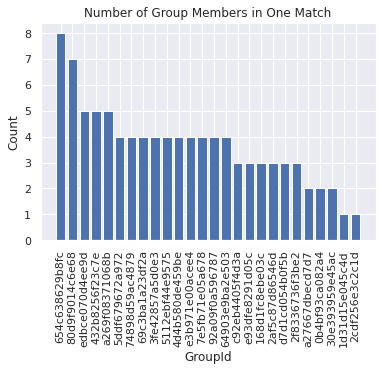

Min number of group members is:  1
Max number of group members is:  8


In [28]:
group_tmp = df[df['matchId']=='a10357fd1a4a91']['groupId'].value_counts().sort_values(ascending=False)
plt.figure()
plt.bar(group_tmp.index,group_tmp.values)
plt.xlabel('GroupId')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Number of Group Members in One Match')
plt.show()

print('Min number of group members is: ',min(group_tmp.values))
print('Max number of group members is: ',max(group_tmp.values))



한 예시로 matchId가 a10357fd1a4a91라는 한판 내에서 groupId가 같은 명수를 세봤는데 4이상인 수가 나왔음. 배그는 4인큐(스쿼드)가 한 팀에서 최대 인원인데 그 이상인 수가 나옴

michaelapers님 왈 "게임에서 연결이 끊기기 때문에 발생하는 현상입니다. 연결 해제가 발생하면 여러 그룹의 플레이어가 API의 데이터베이스에 동일한 최종 배치를 가진 것으로 저장되기 때문입니다. "

----> **결국에는 groupId는 함께한 팀이 아니라 동일한 최종 순위를 가진 선수라고 생각해야 함.** 

# **EDA(시각화)**

In [ ]:
display(df)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.000,0,0,0,60,1241,0,0,0.000,1306,3,28,26,-1,0,0.000,0,0.000,0,0,244.800,1,1466,0.444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.470,0,0,0,57,0,0,0,0.000,1777,3,26,25,1484,0,0.004,0,11.040,0,0,"1,434.000",5,0,0.640
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.000,0,0,0,47,0,0,0,0.000,1318,0,50,47,1491,0,0.000,0,0.000,0,0,161.800,2,0,0.775
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.900,0,0,0,75,0,0,0,0.000,1436,3,31,30,1408,0,0.000,0,0.000,0,0,202.700,3,0,0.167
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000,0,0,0,45,0,1,1,58.530,1424,2,97,95,1560,0,0.000,0,0.000,0,0,49.750,2,0,0.188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.000,0,0,0,74,1029,0,0,0.000,1873,3,29,28,-1,0,"1,292.000",0,0.000,0,0,"1,019.000",3,1507,0.179
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.150,0,0,0,69,0,0,0,0.000,1435,2,93,93,1501,0,0.000,0,0.000,0,0,81.700,6,0,0.294
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.060,0,0,0,66,0,0,0,0.000,1321,3,28,28,1500,0,0.000,0,2.184,0,0,788.700,4,0,0.481
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.400,1,1,2,11,0,2,1,98.500,1373,3,26,25,1418,2,0.000,0,0.000,0,0,"2,748.000",8,0,0.800


## **1) matchtype**
+ matchtype별 전체 기준 얼마나 차지하는지   
- matchtype별 승률의 평균
- matchtype별 승률의 시각화 
  

In [ ]:
# matchType 별로 나눠서 예측
match_count = df['matchType'].value_counts().to_frame().reset_index()
match_count.columns = ["Type","Count"]
match_count

,Type,Count
0,3,2400402
1,0,1315970
2,2,720712


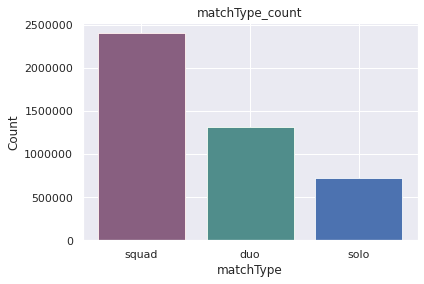

In [ ]:
match_count['Type'][0] = 'squad'    # ★
match_count['Type'][1] = 'duo'
match_count['Type'][2] = 'solo'

# matchType별 경기 참여자 시각화

plt.title('matchType_count')
plt.ticklabel_format(axis ='y', useOffset = False, style = 'plain')
# x축 라벨 설정
plt.xlabel('matchType')
# x축 라벨 설정
plt.ylabel('Count')
# 막대 그래프(x, y)
plt.bar(match_count['Type'], match_count['Count'])
# 막대그래프 색
plt.bar(match_count['Type'], match_count['Count'], color = ['r', 'g', 'b', 'y'], alpha = 0.5)
# 그래프 출력
plt.show()

In [ ]:
types = df["matchType"].value_counts().to_frame()
squads = types.loc[[3],"matchType"].sum()
duos = types.loc[[0],"matchType"].sum()
solo = types.loc[[2],"matchType"].sum()
mt = pd.DataFrame([squads, duos, solo], index=["squad","duo","solo"], columns =["count"])
mt

,count
squad,2400402
duo,1315970
solo,720712


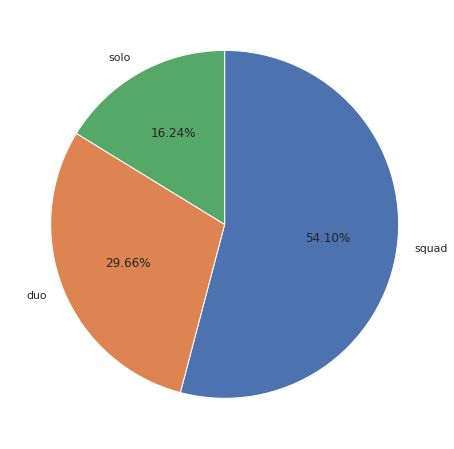

In [ ]:
labels = ['squad', 'duo', 'solo'] ## 라벨  ★
frequency = pd.Series.tolist(mt['count'])

fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
 
ax.pie(frequency, ## 파이차트 출력
       labels=labels, ## 라벨 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계 방향으로 그린다.
       autopct=lambda p : '{:.2f}%'.format(p) ## 퍼센티지 출력
       )
 
plt.show()

# matchtype의 값들은 squad>duo>solo 순으로 많다. 

## **2) Kills** 
(상대방을 죽인 횟수)
- kills의 count 분포 
- kills의 기술통계량
- kills 관련 변수들과 승률의 상관관계
- kills관련 변수들의 이상치


In [33]:
# sum functions
def simple_shot(var):
    print('mean value of {} : {}'.format(var, df_solo[var].mean()))
    print('median value of {} : {}'.format(var, df_solo[var].median()))
    print('top 1% of {} : {}'.format(var, df_solo[var].quantile(0.99)))
    print('max of {} : {}'.format(var, df_solo[var].max()))
    print('min of {} : {}'.format(var, df_solo[var].min()))

In [29]:
df_solo=df.loc[(df.matchType==2), ] 
df_solo

# 솔로인 애들만 추출 

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000,0,0,0,45,0,1,1,58.530,1424,2,97,95,1560,0,0.000,0,0.000,0,0,49.750,2,0,0.188
7,311b84c6ff4390,eaba5fcb7fc1ae,292611730ca862,0,0,8.538,0,0,0,48,1000,0,0,0.000,1967,2,96,92,-1,0,"2,004.000",0,0.000,0,0,"1,089.000",6,1500,0.737
13,b7807186e3f679,3c08e461874749,2c30ddf481c52d,0,1,324.200,0,1,5,5,986,4,1,49.830,1886,2,97,94,-1,0,"1,228.000",0,76.840,0,0,"2,050.000",6,1462,0.875
17,92022479b92ce7,2f2c33f548c4b9,07948d723b9c0f,0,3,254.300,0,0,12,13,0,2,1,36.000,1371,2,96,95,1536,0,"2,367.000",0,15.290,0,0,"1,787.000",3,0,0.821
35,47143f942503e0,e17a8867a393ec,bc2faecb77e5ec,0,0,136.900,0,0,0,37,0,1,1,22.830,1425,2,96,94,1500,0,0.000,0,0.000,0,0,270.700,1,0,0.347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446950,d05b0c4b2ff311,8248fa2552457b,88c002b589d411,0,0,203.500,0,0,0,32,0,1,1,11.270,1897,2,95,92,1489,0,0.000,0,0.000,0,0,"1,559.000",5,0,0.500
4446954,894c01c8e4524f,c33e793af077f9,deb3a91c03d0f3,0,0,30.100,0,0,0,58,1007,0,0,0.000,1908,2,99,97,-1,0,0.000,0,0.000,0,0,"2,146.000",6,1502,0.531
4446959,d29bfa313ad766,ac3f1b4a56e5ad,2f3b1af94739b3,0,0,22.680,0,0,0,89,0,0,0,0.000,1456,2,96,95,1787,0,0.000,0,0.000,0,0,40.250,1,0,0.084
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.150,0,0,0,69,0,0,0,0.000,1435,2,93,93,1501,0,0.000,0,0.000,0,0,81.700,6,0,0.294


In [ ]:
df_solo

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000,0,0,0,45,0,1,1,58.530,1424,2,97,95,1560,0,0.000,0,0.000,0,0,49.750,2,0,0.188
7,311b84c6ff4390,eaba5fcb7fc1ae,292611730ca862,0,0,8.538,0,0,0,48,1000,0,0,0.000,1967,2,96,92,-1,0,"2,004.000",0,0.000,0,0,"1,089.000",6,1500,0.737
13,b7807186e3f679,3c08e461874749,2c30ddf481c52d,0,1,324.200,0,1,5,5,986,4,1,49.830,1886,2,97,94,-1,0,"1,228.000",0,76.840,0,0,"2,050.000",6,1462,0.875
17,92022479b92ce7,2f2c33f548c4b9,07948d723b9c0f,0,3,254.300,0,0,12,13,0,2,1,36.000,1371,2,96,95,1536,0,"2,367.000",0,15.290,0,0,"1,787.000",3,0,0.821
35,47143f942503e0,e17a8867a393ec,bc2faecb77e5ec,0,0,136.900,0,0,0,37,0,1,1,22.830,1425,2,96,94,1500,0,0.000,0,0.000,0,0,270.700,1,0,0.347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446950,d05b0c4b2ff311,8248fa2552457b,88c002b589d411,0,0,203.500,0,0,0,32,0,1,1,11.270,1897,2,95,92,1489,0,0.000,0,0.000,0,0,"1,559.000",5,0,0.500
4446954,894c01c8e4524f,c33e793af077f9,deb3a91c03d0f3,0,0,30.100,0,0,0,58,1007,0,0,0.000,1908,2,99,97,-1,0,0.000,0,0.000,0,0,"2,146.000",6,1502,0.531
4446959,d29bfa313ad766,ac3f1b4a56e5ad,2f3b1af94739b3,0,0,22.680,0,0,0,89,0,0,0,0.000,1456,2,96,95,1787,0,0.000,0,0.000,0,0,40.250,1,0,0.084
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.150,0,0,0,69,0,0,0,0.000,1435,2,93,93,1501,0,0.000,0,0.000,0,0,81.700,6,0,0.294


In [30]:
temp = df_solo['kills'].value_counts().to_frame().reset_index()
temp.columns = ["Kills","Count"]
temp

,Kills,Count
0,0,398898
1,1,165056
2,2,75225
3,3,36539
4,4,19298
5,5,10425
6,6,5939
7,7,3523
8,8,2081
9,9,1287


In [38]:
weaponsAcquired.values

NameError: ignored

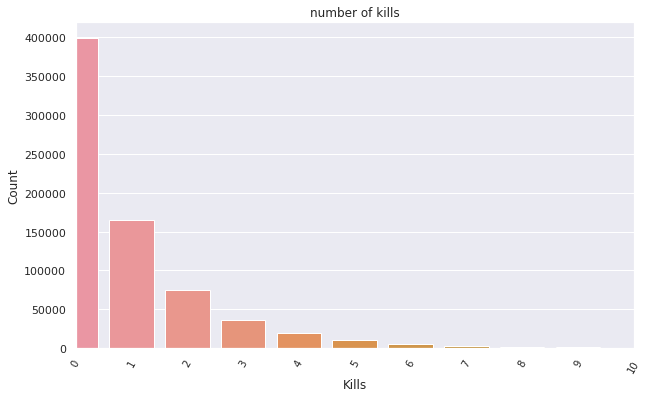

In [31]:
plt.figure(figsize=(10,6))
ticks = temp.Kills.values
ax = sns.barplot(x ="Kills", y = "Count", data = temp)
plt.ticklabel_format(axis ='y', useOffset = False, style = 'plain')
ax.set_xticklabels(ticks, rotation = 60, fontsize = 10)
ax.set_title("number of kills")
plt.xlim([0, 10]) 
plt.show()

In [34]:
simple_shot('kills')

#평균적으로 0.93킬
#99퍼센트의 사람들이 7킬 이하
#가장 많이 기록된 킬은 66킬

mean value of kills : 0.9368596610018981
median value of kills : 0.0
top 1% of kills : 7.0
max of kills : 66
min of kills : 0


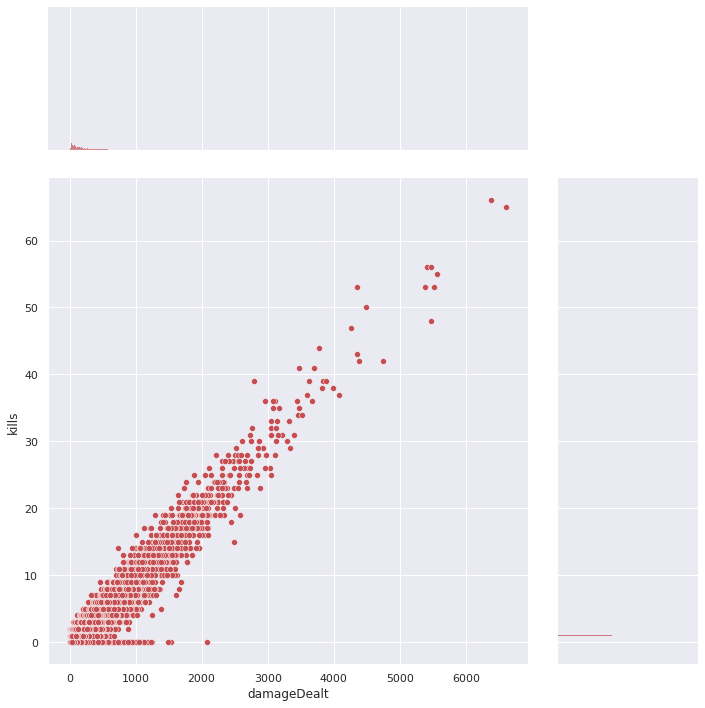

In [ ]:
sns.jointplot(x="damageDealt", y="kills", data=df_solo, height=10, ratio=3, color="r")  # damageDealt가 0인데 kills가 0이상일 가능성 없음 ★
plt.show()

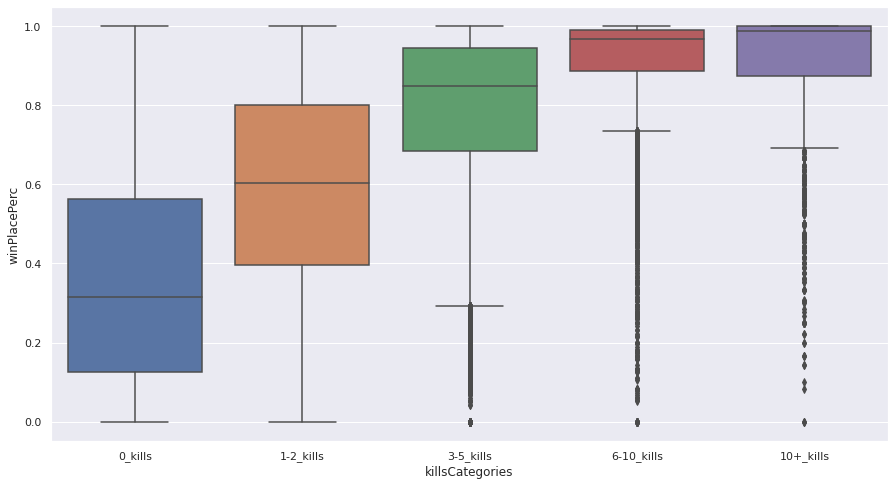

In [35]:
kills = df_solo.copy() #https://docs.python.org/ko/3/library/copy.html   ★

kills['killsCategories'] = pd.cut(kills['kills'], [-1, 0, 2, 5, 10, 80], labels=['0_kills','1-2_kills', '3-5_kills', '6-10_kills', '10+_kills'])

plt.figure(figsize=(15,8))
sns.boxplot(x="killsCategories", y="winPlacePerc", data=kills)
plt.show()

- 킬을 많이 할수록 승률이 높아진다는 것을 확인
 ----> 가정: 그렇다면 kill 관련 변수들은 승률과 양의 관계?   
- kill 관련 변수: assists, damageDealt, headshotKills, killPlace, killPoints,killStreaks,kills, roadKills, teamKills, vehicleDestroys, weaponAcquired, 'DBNOs' 


In [36]:
kill = df_solo[[ 'damageDealt', 'headshotKills', 'killPlace', 'killStreaks','kills', 'roadKills',  'vehicleDestroys', 'weaponsAcquired',  'winPlacePerc']]
corr_rank = kill.corr()["winPlacePerc"].sort_values(ascending=False)
print(corr_rank)

# killplace는 음의 상관계수를 보임---> killplace는 매치에서의 킬 횟수 순위이기 때문에 순위가 높은 것은 숫자가 낮은 값 기준. 즉, killplace와 winPlacePerc는 반비례 관계이기에 음의 상관계수 ★

winPlacePerc       1.000
weaponsAcquired    0.597
damageDealt        0.481
kills              0.476
killStreaks        0.448
headshotKills      0.338
vehicleDestroys    0.061
roadKills          0.050
killPlace         -0.758
Name: winPlacePerc, dtype: float64


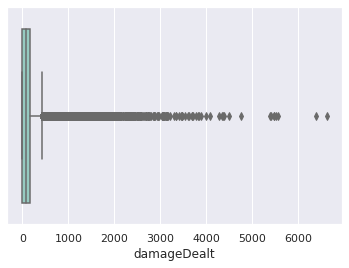

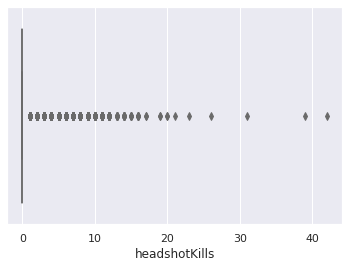

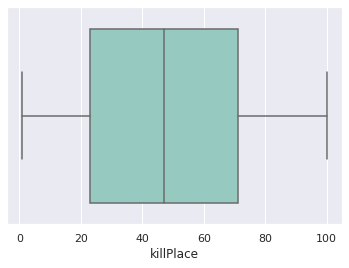

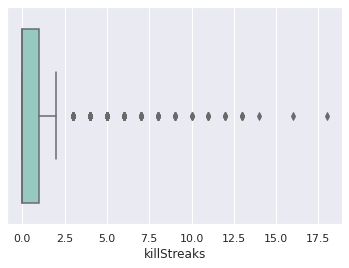

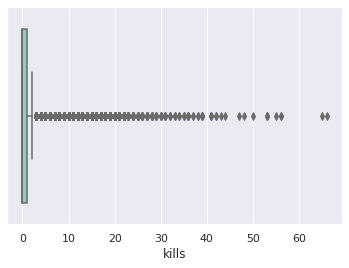

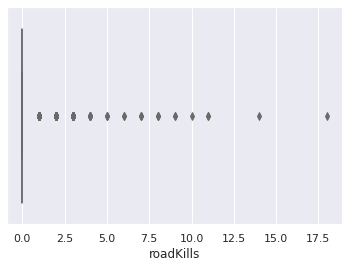

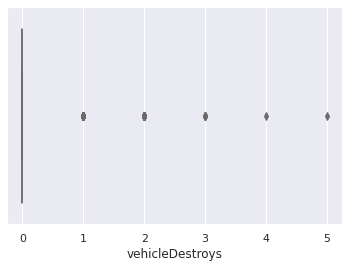

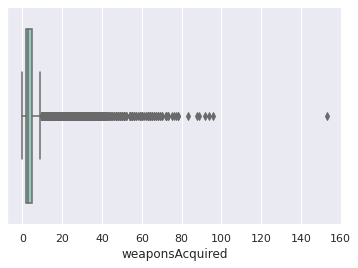

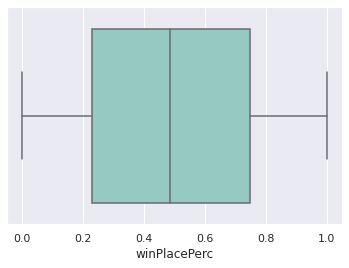

In [37]:
for i in kill:
  sns.boxplot(x = i,  data = df_solo, palette = "Set3")
  plt.show()

- kill과 승률은 양의 상관관계라는 것을 시각화를 통해 알 수 있었음.  
- kill과 관련한 변수들을 상자그래프 시각화를 통해서 확인---> 한 매치 기준 배린이와 고인물들이 같이 존재한다면, 편차가 심한 경우가 생길 수 있기에(ex, 평균적으로 킬 수가 7정도인데 고인물이 독보적으로 20킬 이상 할 수도 있음) 평균 기준을 벗어났다고 해서(통상적인 상자그래프의 이상치 값) 이상치라 여기고 제거하는 것은 무의미함. 

## **3) killStreaks**  X
(짧은 시간안에 상대방을 죽인 횟수)
- KillStreaks의 count 분포
- KillStreaks과 승률의 상관관계

In [ ]:
temp = df_solo['killStreaks'].value_counts().to_frame().reset_index()
temp.columns = ["killStreaks","Count"]
temp

,killStreaks,Count
0,0,398898
1,1,303470
2,2,16846
3,3,1192
4,4,182
5,5,42
6,6,22
7,7,15
8,8,13
9,9,9


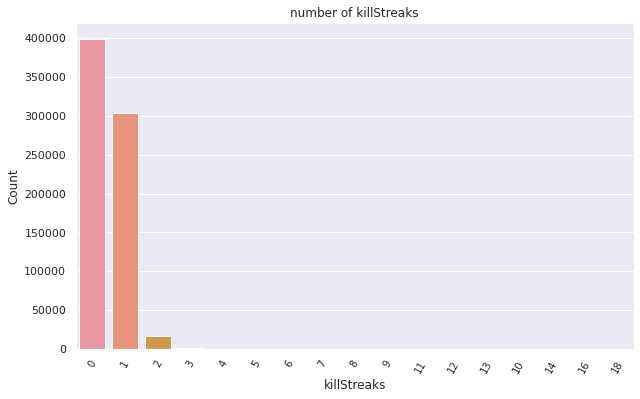

In [ ]:
plt.figure(figsize=(10,6))
ticks = temp.killStreaks.values
ax = sns.barplot(x ="killStreaks", y = "Count", data = temp)
plt.ticklabel_format(axis ='y', useOffset = False, style = 'plain')
ax.set_xticklabels(ticks, rotation = 60, fontsize = 10)
ax.set_title("number of killStreaks")
plt.show()

- 킬을 한 사람 중에서 대부분이 1킬만 하고 끝남.  
- 연달아 킬을 한 경우는 더블킬이 제일 많고 간간히 트리플킬까지 존재.  
- 배그의 특성상 연달아 킬을 하는 경우는 같은 지역에 몰려있는 경우인데 몰려있다면 한 그룹을 만나게 되는 것이니 최대 4명정도가 몰려있다고 생각하니 이 수치가 어느정도 들어 맞는 것 같음. 

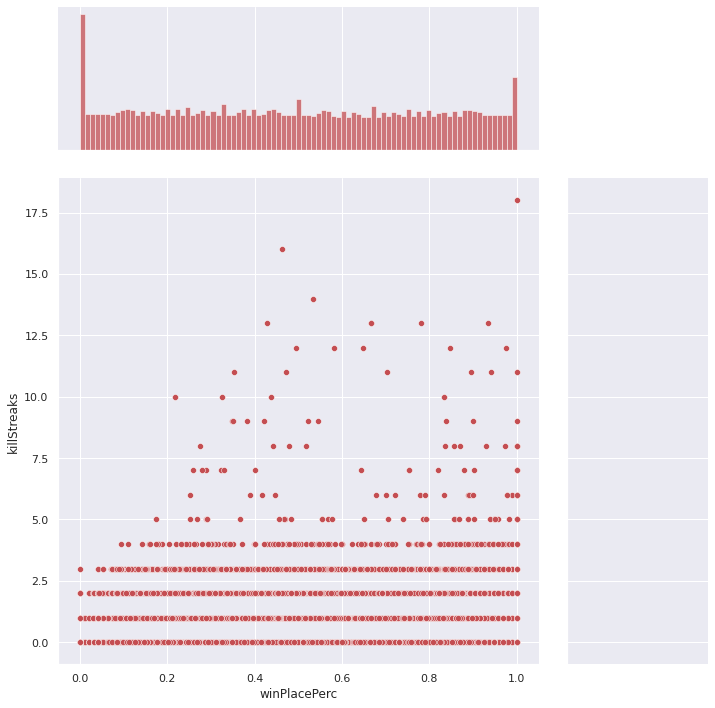

In [ ]:
sns.jointplot(x="winPlacePerc", y="killStreaks", data=df_solo, height=10, ratio=3, color="r")
plt.show()

# 뚜렷한 비례 관계는 아니지만, 어느 정도의 양의 상관관계는 맞는 것 같음 

## **4) RoadKills**
(차량을 타고 상대방을 죽인 스코어=고라니 킬)
- RoadKills의 count 분포
- RoadKills과 승률의 상관관계

In [ ]:
temp = df_solo['roadKills'].value_counts().to_frame().reset_index()
temp.columns = ["roadKills","Count"]
temp

,roadKills,Count
0,0,717393
1,1,3111
2,2,157
3,3,26
4,4,7
5,5,3
6,7,3
7,8,3
8,6,2
9,9,2


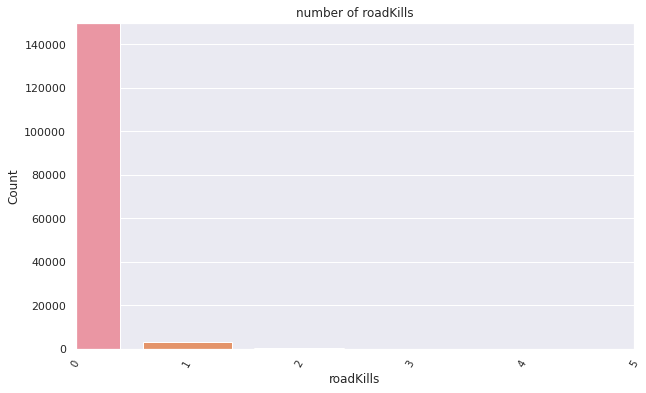

In [ ]:
plt.figure(figsize=(10,6))
ticks = temp.roadKills.values
ax = sns.barplot(x ="roadKills", y = "Count", data = temp)
plt.ticklabel_format(axis ='y', useOffset = False, style = 'plain')
ax.set_xticklabels(ticks, rotation = 60, fontsize = 10)
ax.set_title("number of roadKills")
plt.xlim([0, 5]) 
plt.ylim([0, 150000])
plt.show()

- 0킬이 압도적으로 많음. ----> 배그 특성상 차를 타면 소리가 많이 나기 때문에 적들에게 위치를 들켜서 공격을 받을 수 있고, 본인의 위치를 들키기에 로드킬을 하는 경우가 적음.  
- 1킬은 차를 타고 지나가다가 죽이는 경우가 많지만 2킬 이상부터는 그 수가 줄어듦을 알 수 있음.  

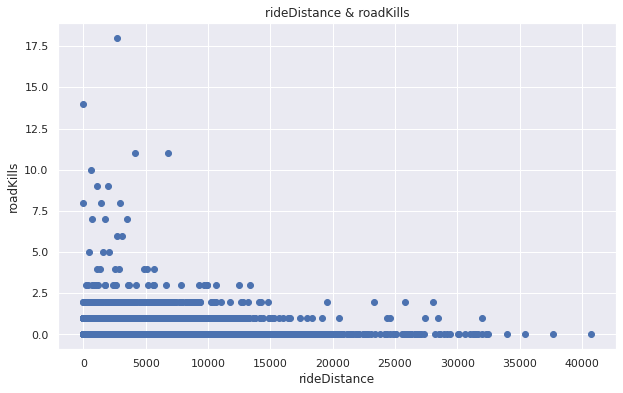

In [ ]:
# 가정: rideDistace가 크면 roadKills의 수도 많을 것이다. ---> 아님   ★  -----> 차량이동량이 0인데 로드킬이 0이상인 이상치 애들이 있음 
plt.figure(figsize=(10,6))
plt.title('rideDistance & roadKills')
# x축 라벨 설정
plt.xlabel('rideDistance')
# x축 라벨 설정
plt.ylabel('roadKills')
plt.ticklabel_format(axis ='y', useOffset = False, style = 'plain')
plt.scatter(df_solo['rideDistance'], df_solo['roadKills'])
plt.show()

## **5) LongestKill**
(사망 시 사망한 플레이어와 본인의 거리)


<AxesSubplot:xlabel='longestKill', ylabel='Density'>

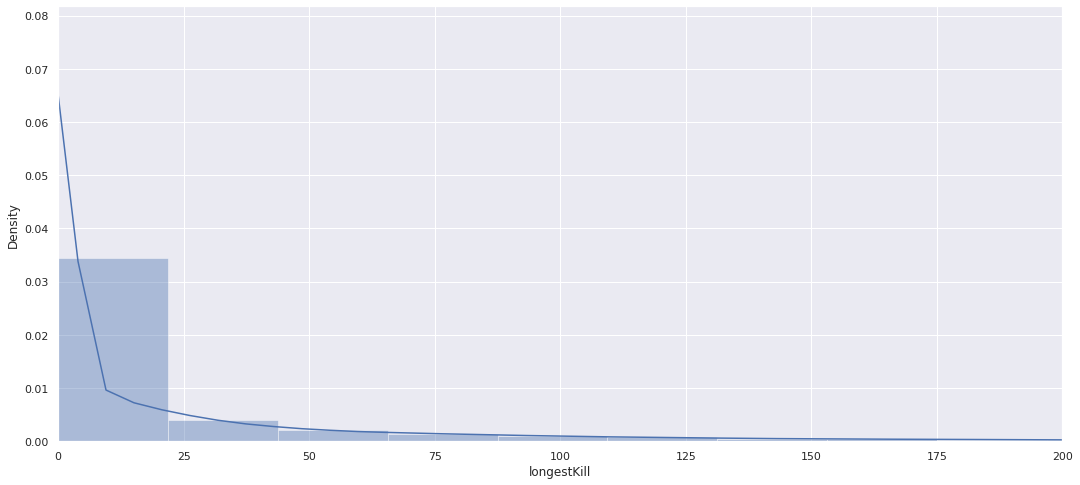

In [ ]:
f, ax = plt.subplots(figsize=(18, 8))  ★
plt.xlim(0, 200)
sns.distplot(df['longestKill'])

- 대부분 0~25m이내에서 킬이 일어남.  
- 간혹 비정상적으로 거리가 멀 때 킬이 기록되는데 이 때 상대를 기절 시키고 차량으로 멀리 간 후, 상대방이 소생하지 못하여 죽었을 경우도 기록이 되는 것으로 보임. ----> 이상치로 여기고 제거할 필요 없음.

# **상관관계 히트맵(시각화)**

In [ ]:
df.corr()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
assists,1.000,0.308,0.407,0.301,0.198,0.229,-0.290,0.039,0.320,0.243,0.261,-0.020,0.055,-0.148,-0.147,-0.016,0.198,0.111,0.011,0.023,0.006,0.058,0.290,0.244,0.024,0.299
boosts,0.308,1.000,0.522,0.359,0.335,0.536,-0.555,0.008,0.502,0.406,0.424,0.073,0.008,-0.014,-0.013,0.023,0.253,0.329,0.037,0.108,0.013,0.087,0.641,0.407,-0.008,0.634
damageDealt,0.407,0.522,1.000,0.736,0.614,0.343,-0.678,0.050,0.889,0.704,0.564,-0.008,0.006,-0.041,-0.040,-0.001,0.257,0.141,0.054,0.037,0.016,0.081,0.398,0.353,0.017,0.441
DBNOs,0.301,0.359,0.736,1.000,0.470,0.266,-0.555,0.043,0.708,0.647,0.451,-0.015,0.090,-0.268,-0.266,-0.003,0.301,0.103,0.036,0.017,0.070,0.060,0.285,0.218,0.011,0.280
headshotKills,0.198,0.335,0.614,0.470,1.000,0.200,-0.470,0.024,0.675,0.513,0.447,-0.019,-0.000,0.009,0.009,0.005,0.150,0.077,0.017,0.028,0.009,0.040,0.251,0.217,0.005,0.278
heals,0.229,0.536,0.343,0.266,0.200,1.000,-0.386,-0.003,0.312,0.271,0.263,0.109,0.025,-0.065,-0.064,0.019,0.237,0.298,0.027,0.080,0.035,0.063,0.430,0.309,-0.011,0.428
killPlace,-0.290,-0.555,-0.678,-0.555,-0.470,-0.386,1.000,-0.023,-0.731,-0.811,-0.542,-0.006,0.004,0.017,0.019,-0.015,-0.270,-0.235,-0.055,-0.089,-0.038,-0.073,-0.591,-0.491,-0.003,-0.719
killPoints,0.039,0.008,0.050,0.043,0.024,-0.003,-0.023,1.000,0.036,0.037,0.014,-0.103,0.044,-0.045,-0.043,-0.976,0.012,-0.028,0.001,-0.005,-0.039,-0.009,0.004,-0.005,0.983,0.013
kills,0.320,0.502,0.889,0.708,0.675,0.312,-0.731,0.036,1.000,0.802,0.603,-0.031,-0.002,-0.005,-0.004,0.008,0.253,0.115,0.061,0.039,0.018,0.079,0.375,0.337,0.007,0.420
killStreaks,0.243,0.406,0.704,0.647,0.513,0.271,-0.811,0.037,0.802,1.000,0.515,-0.035,-0.005,-0.037,-0.036,0.003,0.242,0.098,0.064,0.035,0.028,0.063,0.328,0.276,0.009,0.378


In [ ]:
df_solo

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000,0,0,0,45,0,1,1,58.530,1424,2,97,95,1560,0,0.000,0,0.000,0,0,49.750,2,0,0.188
7,311b84c6ff4390,eaba5fcb7fc1ae,292611730ca862,0,0,8.538,0,0,0,48,1000,0,0,0.000,1967,2,96,92,-1,0,"2,004.000",0,0.000,0,0,"1,089.000",6,1500,0.737
13,b7807186e3f679,3c08e461874749,2c30ddf481c52d,0,1,324.200,0,1,5,5,986,4,1,49.830,1886,2,97,94,-1,0,"1,228.000",0,76.840,0,0,"2,050.000",6,1462,0.875
17,92022479b92ce7,2f2c33f548c4b9,07948d723b9c0f,0,3,254.300,0,0,12,13,0,2,1,36.000,1371,2,96,95,1536,0,"2,367.000",0,15.290,0,0,"1,787.000",3,0,0.821
35,47143f942503e0,e17a8867a393ec,bc2faecb77e5ec,0,0,136.900,0,0,0,37,0,1,1,22.830,1425,2,96,94,1500,0,0.000,0,0.000,0,0,270.700,1,0,0.347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446950,d05b0c4b2ff311,8248fa2552457b,88c002b589d411,0,0,203.500,0,0,0,32,0,1,1,11.270,1897,2,95,92,1489,0,0.000,0,0.000,0,0,"1,559.000",5,0,0.500
4446954,894c01c8e4524f,c33e793af077f9,deb3a91c03d0f3,0,0,30.100,0,0,0,58,1007,0,0,0.000,1908,2,99,97,-1,0,0.000,0,0.000,0,0,"2,146.000",6,1502,0.531
4446959,d29bfa313ad766,ac3f1b4a56e5ad,2f3b1af94739b3,0,0,22.680,0,0,0,89,0,0,0,0.000,1456,2,96,95,1787,0,0.000,0,0.000,0,0,40.250,1,0,0.084
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.150,0,0,0,69,0,0,0,0.000,1435,2,93,93,1501,0,0.000,0,0.000,0,0,81.700,6,0,0.294


In [ ]:
df_solo.corr()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
assists,1.000,0.121,0.338,NaN,0.177,0.093,-0.127,0.026,0.282,0.140,0.134,-0.028,NaN,-0.109,-0.099,-0.021,NaN,0.050,0.009,0.012,-0.001,0.023,0.101,0.254,0.024,0.120
boosts,0.121,1.000,0.549,NaN,0.395,0.501,-0.566,0.013,0.549,0.408,0.454,0.047,NaN,0.033,0.035,0.020,NaN,0.291,0.055,0.115,0.006,0.076,0.640,0.376,-0.001,0.637
damageDealt,0.338,0.549,1.000,NaN,0.677,0.319,-0.691,0.038,0.949,0.679,0.610,-0.020,NaN,-0.071,-0.062,0.001,NaN,0.139,0.077,0.042,-0.004,0.072,0.423,0.412,0.011,0.481
DBNOs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
headshotKills,0.177,0.395,0.677,NaN,1.000,0.214,-0.468,0.021,0.709,0.480,0.516,-0.021,NaN,-0.024,-0.020,0.004,NaN,0.098,0.024,0.036,-0.002,0.044,0.312,0.271,0.003,0.338
heals,0.093,0.501,0.319,NaN,0.214,1.000,-0.361,0.002,0.313,0.258,0.247,0.082,NaN,0.012,0.011,0.015,NaN,0.228,0.038,0.085,0.025,0.052,0.408,0.267,-0.005,0.401
killPlace,-0.127,-0.566,-0.691,NaN,-0.468,-0.361,1.000,-0.013,-0.699,-0.799,-0.548,-0.004,NaN,0.182,0.178,-0.022,NaN,-0.225,-0.069,-0.098,-0.016,-0.058,-0.604,-0.529,0.005,-0.758
killPoints,0.026,0.013,0.038,NaN,0.021,0.002,-0.013,1.000,0.036,0.037,0.017,-0.073,NaN,0.075,0.075,-0.977,NaN,-0.003,0.006,-0.003,-0.031,-0.007,0.011,0.003,0.985,0.024
kills,0.282,0.549,0.949,NaN,0.709,0.313,-0.699,0.036,1.000,0.718,0.631,-0.037,NaN,-0.036,-0.026,0.001,NaN,0.131,0.081,0.046,-0.002,0.069,0.421,0.407,0.011,0.476
killStreaks,0.140,0.408,0.679,NaN,0.480,0.258,-0.799,0.037,0.718,1.000,0.507,-0.046,NaN,0.035,0.042,-0.003,NaN,0.107,0.103,0.041,0.000,0.040,0.352,0.324,0.013,0.448


In [ ]:
df_solo.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

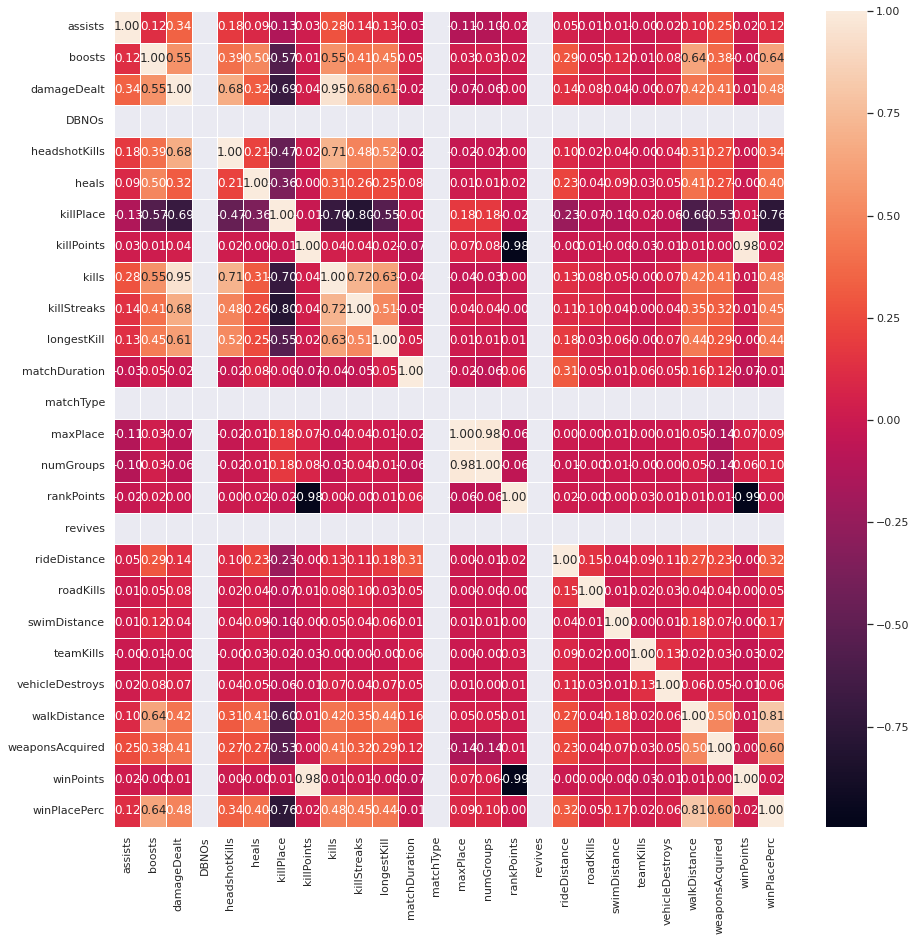

In [ ]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df_solo.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)
plt.show()

In [ ]:
corr_rank = df_solo.corr()["winPlacePerc"].sort_values(ascending=False)
print(corr_rank)

winPlacePerc       1.000
walkDistance       0.811
boosts             0.637
weaponsAcquired    0.597
damageDealt        0.481
kills              0.476
killStreaks        0.448
longestKill        0.438
heals              0.401
headshotKills      0.338
rideDistance       0.318
swimDistance       0.165
assists            0.120
numGroups          0.101
maxPlace           0.094
vehicleDestroys    0.061
roadKills          0.050
teamKills          0.024
killPoints         0.024
winPoints          0.020
rankPoints         0.003
matchDuration     -0.010
killPlace         -0.758
DBNOs                NaN
matchType            NaN
revives              NaN
Name: winPlacePerc, dtype: float64
